2025-09-30 22:44:23.095689: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 22:44:23.101470: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 22:44:23.116109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759283063.139227   19663 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759283063.146034   19663 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759283063.163624   19663 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Número de classes: 2
Classes: ['cat', 'dog']


2025-09-30 22:44:27.744734: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


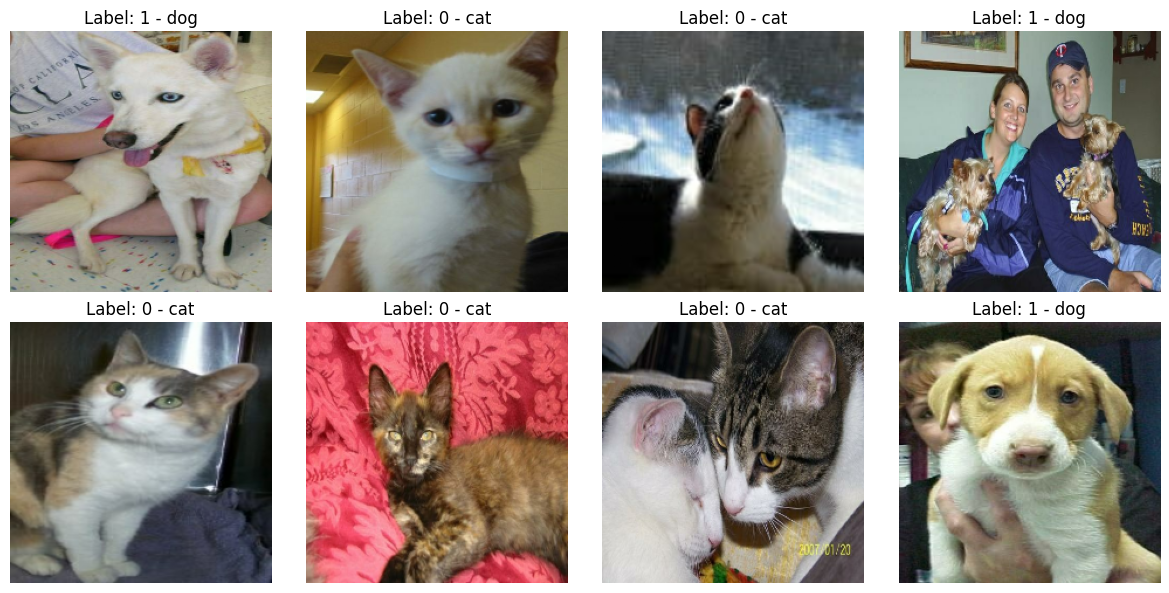

2025-09-30 22:44:29.413285: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [1]:
import sys
sys.path.append('../src')

from data import get_datasets

# Carrega os dados do dataset
train_ds, test_ds, metadata = get_datasets(batch_size=32)

# Explora os dados
print("Número de classes:", len(metadata.features['label'].names))
print("Classes:", metadata.features['label'].names)

# Visualiza algumas imagens
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i].numpy()} - {metadata.features['label'].names[labels[i]]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [2]:
# Carregar dados
print("Carregando Cats vs Dogs...")

from data import download_prepare

raw_train, raw_test, metadata = download_prepare()

print(f"Dataset carregado")
print(f"Treino: {len(raw_train)} exemplos")
print(f"Teste: {len(raw_test)} exemplos")
print(f"Classes: {metadata.features['label'].names}")

Carregando Cats vs Dogs...
Dataset carregado
Treino: 18610 exemplos
Teste: 4652 exemplos
Classes: ['cat', 'dog']


In [3]:
from data import preprocess_image

# Aplicar pré-processamento
train_dataset = raw_train.map(preprocess_image).batch(32)
test_dataset = raw_test.map(preprocess_image).batch(32)

print("Pré-processamento aplicado")

Pré-processamento aplicado


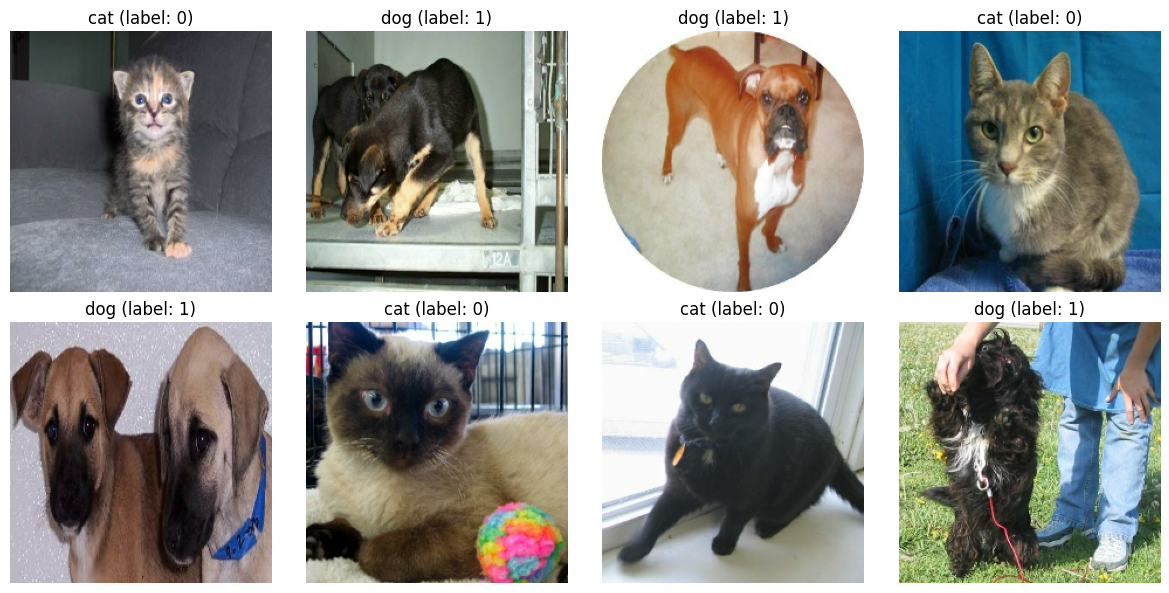

Forma das imagens: (224, 224, 3)
Range dos pixels: [0.000, 1.000]


2025-09-30 17:15:36.776611: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
import tensorflow as tf
# Pegar um batch de exemplos
for images, labels in train_dataset.take(1):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(8):
        axes[i].imshow(images[i])
        class_name = metadata.features['label'].names[labels[i]]
        axes[i].set_title(f"{class_name} (label: {labels[i]})")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Forma das imagens: {images[0].shape}")
    print(f"Range dos pixels: [{tf.reduce_min(images[0]):.3f}, {tf.reduce_max(images[0]):.3f}]")

In [6]:
# Análise estatística básica
import numpy as np
print("=== ANÁLISE ESTATÍSTICA ===")

# Contar classes no treino
train_labels = []
for _, labels in raw_train:
    train_labels.append(labels.numpy())

train_labels = np.array(train_labels)
unique, counts = np.unique(train_labels, return_counts=True)

print("Distribuição das classes no treino:")
for label, count in zip(unique, counts):
    class_name = metadata.features['label'].names[label]
    print(f"  {class_name}: {count} exemplos ({count/len(train_labels)*100:.1f}%)")

print(f"\nTotal de imagens: {len(train_labels)}")

=== ANÁLISE ESTATÍSTICA ===
Distribuição das classes no treino:
  cat: 9378 exemplos (50.4%)
  dog: 9232 exemplos (49.6%)

Total de imagens: 18610
